<a href="https://colab.research.google.com/github/svnty/blood-cell-classification/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test environment

Notebook designed using:

- OS Version: `macOS-14.7.6-arm64-arm-64bit-Mach-O`

- Python Version: `3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:23:37) [Clang 14.0.6 ]`

- Current Working Directory: `/Users/admin/Projects/Programming/blood-cell-classification`

In [9]:
import os
import sys
import platform

print("OS Version:", platform.platform())
print("Python Version:", sys.version)
print("Current Working Directory:", os.getcwd())

OS Version: macOS-14.7.6-arm64-arm-64bit-Mach-O
Python Version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:23:37) [Clang 14.0.6 ]
Current Working Directory: /Users/admin/Projects/Programming/blood-cell-classification


# Install kaggle api

Install the Kaggle API library using pip.


In [ ]:
%pip install kaggle

Check if kaggle API key is available

In [10]:
from pathlib import Path

# The Kaggle API looks for credentials in this order:
# 1. Current working directory: ./kaggle.json
# 2. Home directory: ~/.kaggle/kaggle.json
# 3. Environment variables: KAGGLE_USERNAME and KAGGLE_KEY

# Check current directory first
current_dir_kaggle = Path.cwd() / 'kaggle.json'
home_dir_kaggle = Path.home() / '.kaggle' / 'kaggle.json'

if current_dir_kaggle.exists():
    print("Found kaggle.json in current directory")
    print(f"Location: {current_dir_kaggle}")

    # Set secure permissions (600 = read/write for owner only)
    current_dir_kaggle.chmod(0o600)
    print("Set secure permissions (600) on kaggle.json")
elif home_dir_kaggle.exists():
    print("Found kaggle.json in home directory")
    print(f"Location: {home_dir_kaggle}")

    # Set secure permissions (600 = read/write for owner only)
    home_dir_kaggle.chmod(0o600)
    print("Set secure permissions (600) on kaggle.json")
else:
    print("ERROR: No kaggle.json found")
    print("Recommended to place it in current directory: {current_dir_kaggle}")
    print("\nDownload it from: https://www.kaggle.com/settings")
    print("After placing the file, run this script again and it will automatically set secure permissions.")

Found kaggle.json in current directory
Location: /Users/admin/Projects/Programming/blood-cell-classification/kaggle.json
Set secure permissions (600) on kaggle.json


# Download dataset

Download the "Blood Cell Images" dataset from Kaggle and extract it to a directory named "dataset".

In [ ]:
os.makedirs("dataset", exist_ok=True)
print("Dataset directory created successfully!")

Dataset directory created successfully!


## Download the dataset

Use the Kaggle API to download the specified dataset.


In [23]:
import kaggle

# Download the dataset using Python API
kaggle.api.dataset_download_files('draaslan/blood-cell-detection-dataset', path='.', unzip=False)
print("Dataset downloaded successfully!")

Dataset URL: https://www.kaggle.com/datasets/draaslan/blood-cell-detection-dataset
Dataset downloaded successfully!


Unzip the folder

In [ ]:
import zipfile

# Get current directory and construct the zip file path
zip_path = os.path.join(os.getcwd(), "blood-cell-detection-dataset.zip")

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.join(os.getcwd(), "dataset"))

# Data Processing

Now that we have downloaded and extracted the dataset, let's begin processing the blood cell data for classification/detection.

In [1]:
%pip install pandas matplotlib seaborn scikit-learn tensorflow keras opencv-python

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
# Import essential libraries for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

# Set up plotting style - avoid emojis in plot titles to prevent font issues
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib to handle font issues on macOS
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial', 'sans-serif']

print("📚 Libraries imported successfully!")
print("📊 Ready for data processing!")

📚 Libraries imported successfully!
📊 Ready for data processing!


# Dataset Overview

Let's examine the structure and contents of our blood cell dataset.

In [13]:
# Define dataset paths
dataset_path = Path("dataset")
images_path = dataset_path / "images"
annotations_file = dataset_path / "annotations.csv"

# Load annotations
annotations_df = pd.read_csv(annotations_file)

print("📊 Dataset Information:")
print(f"📁 Dataset path: {dataset_path}")
print(f"🖼️ Images path: {images_path}")
print(f"📝 Annotations file: {annotations_file}")
print(f"📋 Total annotations: {len(annotations_df)}")
print(f"🖼️ Unique images annotated: {annotations_df['image'].nunique()}") # Not every image has an annotation

# Display first few rows
print("\n📝 Sample annotations:")
print(annotations_df.head())

📊 Dataset Information:
📁 Dataset path: dataset
🖼️ Images path: dataset/images
📝 Annotations file: dataset/annotations.csv
📋 Total annotations: 2340
🖼️ Unique images annotated: 100

📝 Sample annotations:
           image       xmin       ymin        xmax       ymax label
0  image-100.png   0.000000   0.000000   25.190198  40.816803   rbc
1  image-100.png  15.010502   0.000000   68.337223  23.527421   rbc
2  image-100.png  25.017503  16.021004   78.374562  73.735123   rbc
3  image-100.png  75.565928   1.061844  140.248541  45.591599   rbc
4  image-100.png  77.483081  23.290548  131.936989  74.806301   rbc


In [14]:
# Analyze the annotations data
print("🔍 Data Analysis:")
print(f"📊 Data shape (rows, cols): {annotations_df.shape}")
print(f"📋 Column names: {list(annotations_df.columns)}")
print(f"🏷️ Unique labels: {annotations_df['label'].unique()}")
print(f"📊 Label distribution:")
print(annotations_df['label'].value_counts())

# Check for missing values
print(f"\n❓ Missing values:")
print(annotations_df.isnull().sum())

# Basic statistics
print(f"\n📈 Bounding box statistics:")
print(annotations_df[['xmin', 'ymin', 'xmax', 'ymax']].describe())



🔍 Data Analysis:
📊 Data shape (rows, cols): (2340, 6)
📋 Column names: ['image', 'xmin', 'ymin', 'xmax', 'ymax', 'label']
🏷️ Unique labels: ['rbc' 'wbc']
📊 Label distribution:
label
rbc    2237
wbc     103
Name: count, dtype: int64

❓ Missing values:
image    0
xmin     0
ymin     0
xmax     0
ymax     0
label    0
dtype: int64

📈 Bounding box statistics:
              xmin         ymin         xmax         ymax
count  2340.000000  2340.000000  2340.000000  2340.000000
mean    102.843250   103.125775   151.975153   152.076329
std      79.823387    79.176132    79.894451    78.826772
min       0.000000     0.000000     9.213078     8.046223
25%      24.476888    26.142052    78.457354    81.753297
50%      95.797069    97.856257   156.522237   156.550126
75%     176.683766   172.805492   230.296787   228.775648
max     249.533258   247.891770   256.000000   256.000000


In [15]:
print("🔍 Bounding box statistics ANALYSIS:")
print(f"📊 We have {len(annotations_df)} bounding boxes total")
print(f"📊 These boxes are spread across {annotations_df['image'].nunique()} different images")

# Calculate actual bounding box dimensions
annotations_df['bbox_width'] = annotations_df['xmax'] - annotations_df['xmin']
annotations_df['bbox_height'] = annotations_df['ymax'] - annotations_df['ymin']

print(f"\n📐 ACTUAL Bounding Box Sizes:")
print(f"Average width: {annotations_df['bbox_width'].mean():.1f} pixels")
print(f"Average height: {annotations_df['bbox_height'].mean():.1f} pixels")
print(f"Smallest box: {annotations_df['bbox_width'].min():.1f} x {annotations_df['bbox_height'].min():.1f} pixels")
print(f"Largest box: {annotations_df['bbox_width'].max():.1f} x {annotations_df['bbox_height'].max():.1f} pixels")

# Check what the actual image dimensions are by loading the first image in the annotations csv
sample_image = annotations_df['image'].iloc[0]
sample_img = cv2.imread(str(images_path / sample_image))
actual_height, actual_width = sample_img.shape[:2]

print(f"\n🖼️ ACTUAL Image Dimensions:")
print(f"Sample image ({sample_image}): {actual_width} x {actual_height} pixels")
print(f"Max coordinates found: x={annotations_df['xmax'].max():.0f}, y={annotations_df['ymax'].max():.0f}")

🔍 Bounding box statistics ANALYSIS:
📊 We have 2340 bounding boxes total
📊 These boxes are spread across 100 different images

📐 ACTUAL Bounding Box Sizes:
Average width: 49.1 pixels
Average height: 49.0 pixels
Smallest box: 6.5 x 7.5 pixels
Largest box: 153.5 x 124.0 pixels

🖼️ ACTUAL Image Dimensions:
Sample image (image-100.png): 256 x 256 pixels
Max coordinates found: x=256, y=256


# Image Exploration

Let's examine some sample images and visualize the bounding boxes.

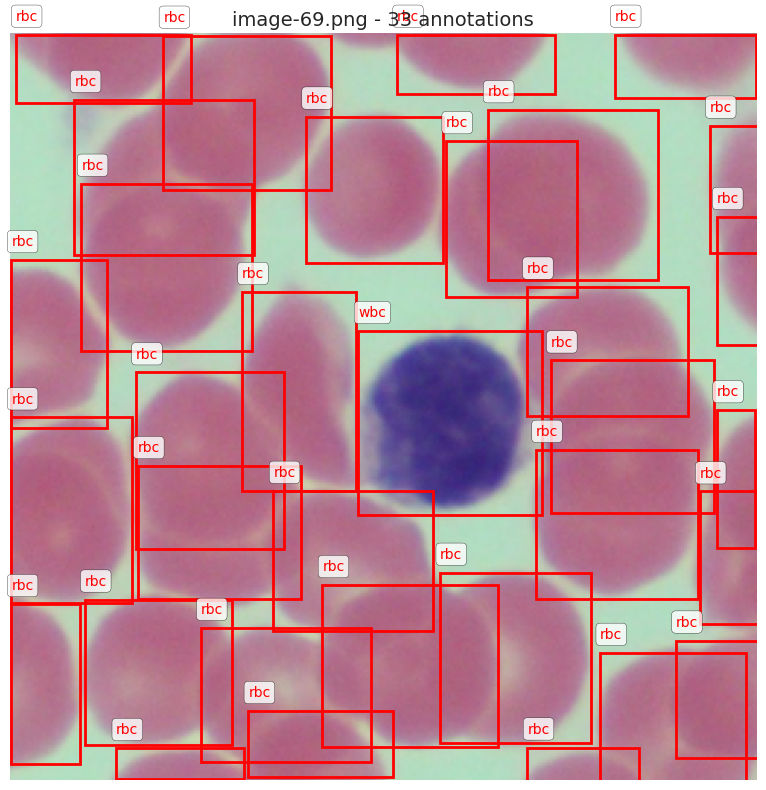

📏 image-69.png: Shape = (256, 256, 3), Annotations = 33
--------------------------------------------------


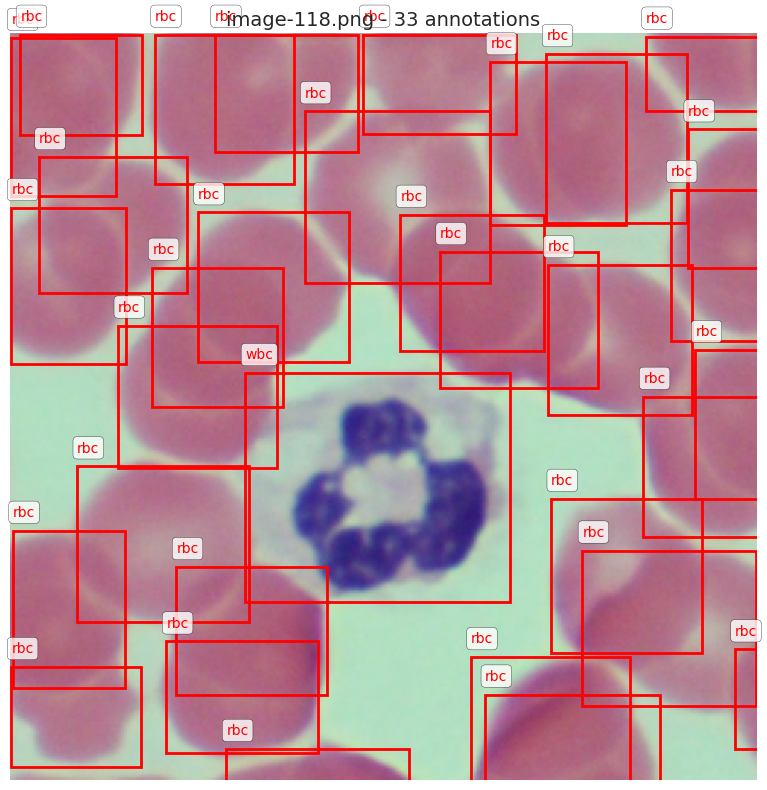

📏 image-118.png: Shape = (256, 256, 3), Annotations = 33
--------------------------------------------------


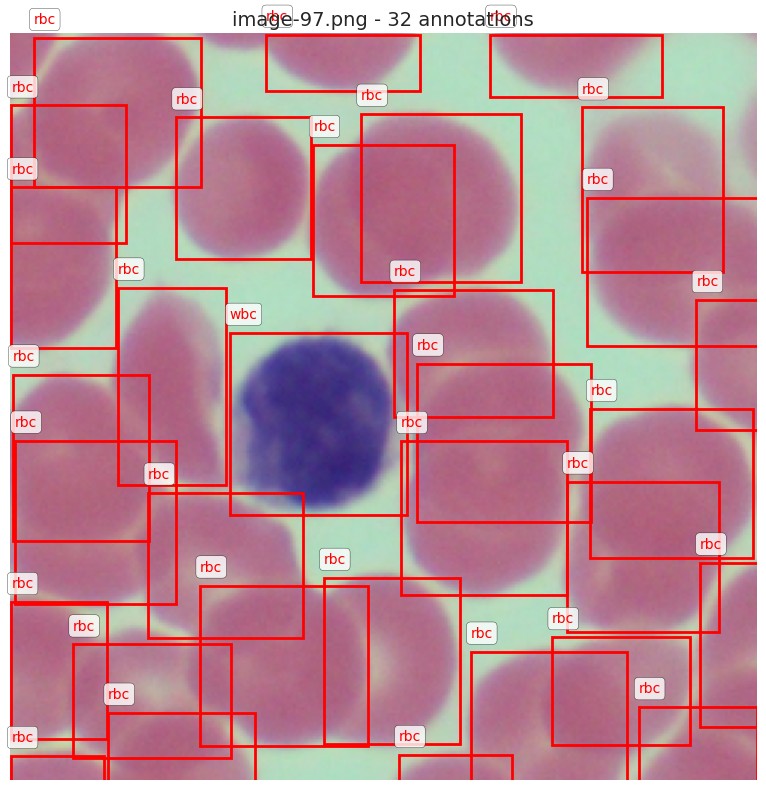

📏 image-97.png: Shape = (256, 256, 3), Annotations = 32
--------------------------------------------------


In [16]:
def visualize_image_with_bboxes(image_name, annotations_df, images_path):
    """
    Visualize an image with its bounding boxes
    """
    # Load image
    img_path = images_path / image_name
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get annotations for this image
    img_annotations = annotations_df[annotations_df['image'] == image_name]
    
    # Create plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.imshow(img)
    
    # Draw bounding boxes
    for _, row in img_annotations.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        label = row['label']
        
        # Draw rectangle
        rect = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, 
                           fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        
        # Add label
        ax.text(xmin, ymin-5, label, fontsize=10, color='red', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    
    # Use plain text for title to avoid font issues
    ax.set_title(f'{image_name} - {len(img_annotations)} annotations', fontsize=14)
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    return img.shape, len(img_annotations)

# Visualize a few sample images
sample_images = annotations_df['image'].value_counts().head(3).index.tolist()

for img_name in sample_images:
    img_shape, num_annotations = visualize_image_with_bboxes(img_name, annotations_df, images_path)
    print(f"📏 {img_name}: Shape = {img_shape}, Annotations = {num_annotations}")
    print("-" * 50)

# Create training/test split

In [17]:
def create_train_test_split(annotations_df, test_size=0.2, random_state=42):
    """
    Create train/test split based on images (not individual annotations)
    This ensures no data leakage between train and test sets
    """
    import numpy as np
    
    unique_images = annotations_df['image'].unique()
    np.random.seed(random_state)
    
    # Shuffle images
    shuffled_images = np.random.permutation(unique_images)
    
    # Split
    n_test = int(len(shuffled_images) * test_size)
    test_images = shuffled_images[:n_test]
    train_images = shuffled_images[n_test:]
    
    # Create train/test dataframes
    train_df = annotations_df[annotations_df['image'].isin(train_images)]
    test_df = annotations_df[annotations_df['image'].isin(test_images)]
    
    return train_df, test_df, train_images, test_images

# Create train/test split
print("🔄 Creating train/test split...")
train_df, test_df, train_images, test_images = create_train_test_split(annotations_df, test_size=0.2)

print(f"📊 Dataset Split Summary:")
print(f"Total images: {len(annotations_df['image'].unique())}")
print(f"Training images: {len(train_images)} ({len(train_images)/len(annotations_df['image'].unique())*100:.1f}%)")
print(f"Test images: {len(test_images)} ({len(test_images)/len(annotations_df['image'].unique())*100:.1f}%)")
print(f"Training annotations: {len(train_df)}")
print(f"Test annotations: {len(test_df)}")

# Verify no data leakage
assert len(set(train_images).intersection(set(test_images))) == 0, "Data leakage detected!"
print("✅ No data leakage detected - train/test split is clean!")

🔄 Creating train/test split...
📊 Dataset Split Summary:
Total images: 100
Training images: 80 (80.0%)
Test images: 20 (20.0%)
Training annotations: 1882
Test annotations: 458
✅ No data leakage detected - train/test split is clean!


# 🧠 Neural Network Training

Now let's prepare our data for neural network training. We'll start with image classification by extracting blood cell regions from the bounding boxes.

In [20]:
# Import additional libraries for neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

TensorFlow version: 2.20.0
GPU Available: []


In [21]:
def extract_cell_regions(annotations_df, images_path, target_size=(64, 64)):
    """
    Extract blood cell regions from images using bounding box coordinates
    """
    cell_images = []
    cell_labels = []
    
    print(f"🔄 Extracting cell regions (target size: {target_size})...")
    
    for idx, row in annotations_df.iterrows():
        # Load full image
        img_path = images_path / row['image']
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Extract bounding box coordinates
        xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        
        # Ensure coordinates are within image bounds
        xmin = max(0, xmin)
        ymin = max(0, ymin)
        xmax = min(img.shape[1], xmax)
        ymax = min(img.shape[0], ymax)
        
        # Extract cell region
        cell_region = img[ymin:ymax, xmin:xmax]
        
        # Skip if region is too small
        if cell_region.shape[0] < 5 or cell_region.shape[1] < 5:
            continue
            
        # Resize to target size
        cell_region_resized = cv2.resize(cell_region, target_size)
        
        cell_images.append(cell_region_resized)
        cell_labels.append(row['label'])
        
        # Progress indicator
        if (idx + 1) % 500 == 0:
            print(f"Processed {idx + 1} annotations of {len(annotations_df)} unique images")
    
    return np.array(cell_images), np.array(cell_labels)

# Extract cell regions from training data
print("📊 Extracting training cell regions...")
X_train_cells, y_train_cells = extract_cell_regions(train_df, images_path, target_size=(64, 64))

print("📊 Extracting test cell regions...")
X_test_cells, y_test_cells = extract_cell_regions(test_df, images_path, target_size=(64, 64))

print(f"\n✅ Data extraction complete!")
print(f"Training data shape (samples, pixels_x, pixels_y, colours[R,G,B]): {X_train_cells.shape}")
print(f"Training labels shape: {y_train_cells.shape}")
print(f"Test data shape: {X_test_cells.shape}")
print(f"Test labels shape: {y_test_cells.shape}")
print(f"Label distribution in training: {np.unique(y_train_cells, return_counts=True)}")

📊 Extracting training cell regions...
🔄 Extracting cell regions (target size: (64, 64))...
Processed 1000 annotations of 1882 unique images
Processed 1500 annotations of 1882 unique images
Processed 2000 annotations of 1882 unique images
📊 Extracting test cell regions...
🔄 Extracting cell regions (target size: (64, 64))...
Processed 500 annotations of 458 unique images

✅ Data extraction complete!
Training data shape (samples, pixels_x, pixels_y, colours[R,G,B]): (1882, 64, 64, 3)
Training labels shape: (1882,)
Test data shape: (458, 64, 64, 3)
Test labels shape: (458,)
Label distribution in training: (array(['rbc', 'wbc'], dtype='<U3'), array([1800,   82]))


In [22]:
# Normalize pixel values to [0, 1] range
X_train_normalized = X_train_cells.astype('float32') / 255.0
X_test_normalized = X_test_cells.astype('float32') / 255.0

# Encode labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_cells)
y_test_encoded = label_encoder.transform(y_test_cells)

# Convert to categorical (one-hot encoding)
num_classes = len(label_encoder.classes_)
y_train_categorical = keras.utils.to_categorical(y_train_encoded, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test_encoded, num_classes)

print(f"📊 Data preprocessing complete:")
print(f"Number of classes: {num_classes}")
print(f"Class names: {label_encoder.classes_}")
print(f"Training data shape: {X_train_normalized.shape}")
print(f"Training labels shape: {y_train_categorical.shape}")
print(f"Pixel value range: [{X_train_normalized.min():.2f}, {X_train_normalized.max():.2f}]")

📊 Data preprocessing complete:
Number of classes: 2
Class names: ['rbc' 'wbc']
Training data shape: (1882, 64, 64, 3)
Training labels shape: (1882, 2)
Pixel value range: [0.06, 0.91]


In [23]:
def create_mlp_model(input_shape, num_classes):
    """
    Create a pure MLP model for blood cell classification
    """
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the MLP model
input_shape = X_train_normalized.shape[1:]  # (64, 64, 3)
model = create_mlp_model(input_shape, num_classes)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
print("🏗️ MLP Model Architecture:")
model.summary()


🏗️ MLP Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,423,810 (24.50 MB)

 Trainable params: 6,423,810 (24.50 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Set up callbacks for training
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='best_blood_cell_model.keras',
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False
    )
]

# Train the model
print("🚀 Starting training...")
print(f"Training on {len(X_train_normalized)} samples")
print(f"Validating on {len(X_test_normalized)} samples")

history = model.fit(
    X_train_normalized, y_train_categorical,
    batch_size=32,
    epochs=50,  # Will stop early if no improvement
    validation_data=(X_test_normalized, y_test_categorical),
    callbacks=callbacks,
    verbose=1
)

print("✅ Training completed!")

🚀 Starting training...
Training on 1882 samples
Validating on 458 samples
Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9182 - loss: 1.7760 - val_accuracy: 0.9541 - val_loss: 0.2286 - learning_rate: 0.0010
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9357 - loss: 0.4192 - val_accuracy: 0.9956 - val_loss: 0.0413 - learning_rate: 0.0010
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9617 - loss: 0.1257 - val_accuracy: 0.9563 - val_loss: 0.0714 - learning_rate: 0.0010
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9623 - loss: 0.1307 - val_accuracy: 0.9956 - val_loss: 0.0452 - learning_rate: 0.0010
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9702 - loss: 0.1130 - val_accuracy: 0.9825 - val_loss: 0.0636 - learning_rate: 0.0010
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9766 - loss: 0.1292 - val_accuracy: 0.9934 - val_loss: 0.0528 - learning_rate: 0.0010
Epoch 7/50
59/59 ━━━

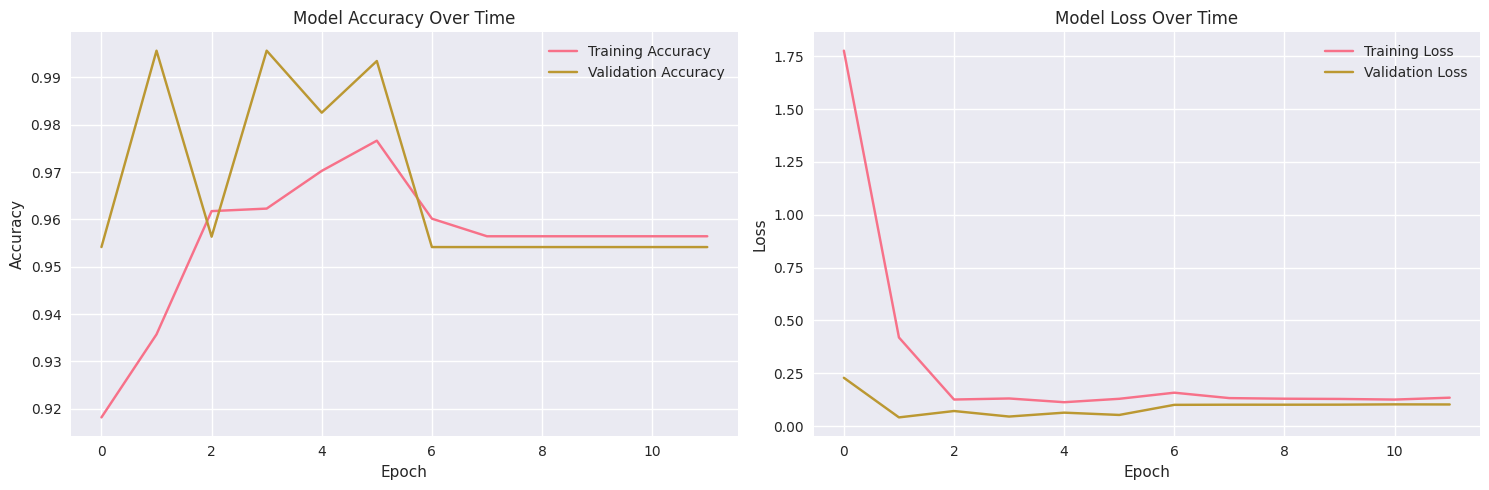

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
📊 Detailed Classification Report:
              precision    recall  f1-score   support

         rbc       1.00      1.00      1.00       437
         wbc       1.00      0.90      0.95        21

    accuracy                           1.00       458
   macro avg       1.00      0.95      0.97       458
weighted avg       1.00      1.00      1.00       458



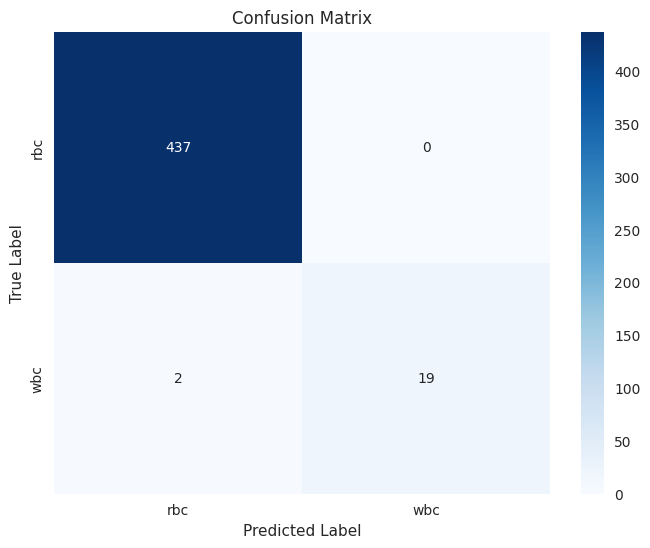

🎯 Neural Network Training Complete!


In [28]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy Over Time')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Make predictions and create detailed evaluation
y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Classification report
print("📊 Detailed Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, 
                          target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("🎯 Neural Network Training Complete!")

In [30]:
# After training
best_epoch = np.argmin(history.history['val_loss'])
best_val_loss = history.history['val_loss'][best_epoch]
print(f"Best epoch: {best_epoch + 1}")  # +1 because epochs are 1-indexed
print(f"Best validation loss: {best_val_loss:.4f}")
best_val_acc = history.history['val_accuracy'][best_epoch]
print(f"Best validation accuracy: {best_val_acc:.4f}")

Best epoch: 2
Best validation loss: 0.0413
Best validation accuracy: 0.9956


# PAC-Learnability Analysis

Let's analyze whether our neural network classifier is PAC-learnable by calculating the required sample size for a given error margin ($\epsilon$) and failure probability ($\delta$).

In [ ]:
from math import log, ceil

# Choose epsilon (error margin) and delta (failure probability)
epsilon = 0.05  # 5% error margin
delta = 0.05   # 5% failure probability

# PAC sample size formula:
n_required = (1 / (2 * epsilon**2)) * np.log(2 / delta)
n_required = ceil(n_required)

print(f"PAC-Learnability Analysis:")
print(f"Chosen epsilon (error margin): {epsilon:.2f}")
print(f"Chosen delta (failure probability): {delta:.2f}")
print(f"Required sample size for PAC-learnability: n >= {n_required}")

# Compare with actual training set size
print(f"Actual training samples used: {X_train_normalized.shape[0]}")
if X_train_normalized.shape[0] >= n_required:
    print("\n✅ The training set size meets the PAC-learnability requirement for these parameters.")
else:
    print("\n⚠️ The training set size is below the PAC-learnability threshold for these parameters.")


# Empirical error rate at best epoch
empirical_error = 1 - best_val_acc

print(f"\nEmpirical error rate at best epoch: {empirical_error:.4f}")
print(f"PAC criterion: Error ≤ epsilon ({epsilon}), Success rate ≥ 1 - delta ({1 - delta:.2f})")

if empirical_error <= epsilon:
    print(f"\n✅ Success: Empirical error ({empirical_error:.4f}) ≤ epsilon ({epsilon})")
    print(f"Probability of success meets PAC criterion: ≥ {1 - delta:.2f}")
else:
    print(f"\n⚠️ Failure: Empirical error ({empirical_error:.4f}) > epsilon ({epsilon})")
    print(f"Probability of success does NOT meet PAC criterion.")

PAC-Learnability Analysis:
Chosen epsilon (error margin): 0.05
Chosen delta (failure probability): 0.05
Required sample size for PAC-learnability: n >= 738
Actual training samples used: 1882

✅ The training set size meets the PAC-learnability requirement for these parameters.

Empirical error rate at best epoch: 0.0044
PAC criterion: Error ≤ epsilon (0.05), Success rate ≥ 1 - delta (0.95)

✅ Success: Empirical error (0.0044) ≤ epsilon (0.05)
Validation error 0.9956 >= success rate 0.95
Probability of success meets PAC criterion: ≥ 0.95
